Importing the Required Libraries

In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
import math
from keras import Sequential
from keras.layers import LSTM, Dense

In [ ]:
from google.colab import files
import io
import missingno
import seaborn as sns

Dataset

In [ ]:
uploaded = files.upload()

Saving train_set.csv to train_set.csv


In [ ]:
dataframe = pd.read_csv(io.BytesIO(uploaded['train_set.csv']))

In [ ]:
# dataset = dataset.reset_index()["close"]
# plt.plot(dataset)
"""
plt.figure(figsize=(16, 8))
plt.title("History")
plt.plot(dataframe["close"])
plt.xlabel("Date")
plt.ylabel("Close Price ")
plt.show()
"""

'\nplt.figure(figsize=(16, 8))\nplt.title("History")\nplt.plot(dataframe["close"])\nplt.xlabel("Date")\nplt.ylabel("Close Price ")\nplt.show()\n'

In [ ]:
data = dataframe.filter(["close"])
dataset = data.values

In [ ]:
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

11896

In [ ]:
Normalization = MinMaxScaler(feature_range=(0, 1))

scaled_data = Normalization.fit_transform(dataset)
train_data = scaled_data[0:training_data_len, :]
print(scaled_data)
# Splitting the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()
print(len(x_train))

[[0.21522382]
 [0.22455401]
 [0.22231039]
 ...
 [0.50363905]
 [0.50322863]
 [0.5069224 ]]
[array([0.21522382, 0.22455401, 0.22231039, 0.22430776, 0.22622305,
       0.22581263, 0.22871293, 0.22800153, 0.22800153, 0.22310386,
       0.22507388, 0.22154427, 0.22381526, 0.22482762, 0.22748167,
       0.2273175 , 0.23131225, 0.23128489, 0.23027252, 0.22934223,
       0.22835723, 0.22635986, 0.22737222, 0.22096968, 0.22663347,
       0.22712597, 0.22756375, 0.22991682, 0.2293696 , 0.23046405,
       0.23046405, 0.23426726, 0.23377476, 0.23399365, 0.23418518,
       0.23413046, 0.23251614, 0.23257087, 0.23303601, 0.23194156,
       0.23051877, 0.23246142, 0.23432199, 0.23429463, 0.2349513 ,
       0.2350881 , 0.23202364, 0.23210572, 0.23257087, 0.2315585 ,
       0.23161322, 0.23092919, 0.22827515, 0.2264693 , 0.22819306,
       0.2286582 , 0.22876765, 0.2315585 , 0.23136697, 0.23147641])]
[0.2311754405165809]

11836


In [ ]:
# To numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=50, epochs=80)

Epoch 1/80
237/237 [==============================] - 32s 114ms/step - loss: 0.0202
Epoch 2/80
237/237 [==============================] - 27s 113ms/step - loss: 1.5764e-04
Epoch 3/80
237/237 [==============================] - 27s 113ms/step - loss: 1.4417e-04
Epoch 4/80
237/237 [==============================] - 27s 113ms/step - loss: 1.3864e-04
Epoch 5/80
237/237 [==============================] - 27s 113ms/step - loss: 1.4436e-04
Epoch 6/80
237/237 [==============================] - 27s 114ms/step - loss: 1.2975e-04
Epoch 7/80
237/237 [==============================] - 27s 113ms/step - loss: 1.2861e-04
Epoch 8/80
237/237 [==============================] - 27s 113ms/step - loss: 1.1849e-04
Epoch 9/80
237/237 [==============================] - 27s 113ms/step - loss: 1.6692e-04
Epoch 10/80
237/237 [==============================] - 27s 114ms/step - loss: 1.1333e-04
Epoch 11/80
237/237 [==============================] - 27s 113ms/step - loss: 9.6971e-05
Epoch 12/80
237/237 [=============

In [ ]:
# To numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the x_train
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(32))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=50, epochs=80)

Epoch 1/80
237/237 [==============================] - 32s 113ms/step - loss: 0.0192
Epoch 2/80
237/237 [==============================] - 27s 113ms/step - loss: 1.5637e-04
Epoch 3/80
237/237 [==============================] - 27s 112ms/step - loss: 1.7661e-04
Epoch 4/80
237/237 [==============================] - 27s 112ms/step - loss: 1.4848e-04
Epoch 5/80
237/237 [==============================] - 27s 112ms/step - loss: 1.3213e-04
Epoch 6/80
237/237 [==============================] - 27s 112ms/step - loss: 1.3733e-04
Epoch 7/80
237/237 [==============================] - 27s 112ms/step - loss: 1.3474e-04
Epoch 8/80
237/237 [==============================] - 27s 113ms/step - loss: 1.3268e-04
Epoch 9/80
237/237 [==============================] - 27s 113ms/step - loss: 1.5080e-04
Epoch 10/80
237/237 [==============================] - 27s 112ms/step - loss: 1.1106e-04
Epoch 11/80
237/237 [==============================] - 27s 112ms/step - loss: 1.2322e-04
Epoch 12/80
237/237 [=============

In [ ]:
# Testing data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = Normalization.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.6182105748612345

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


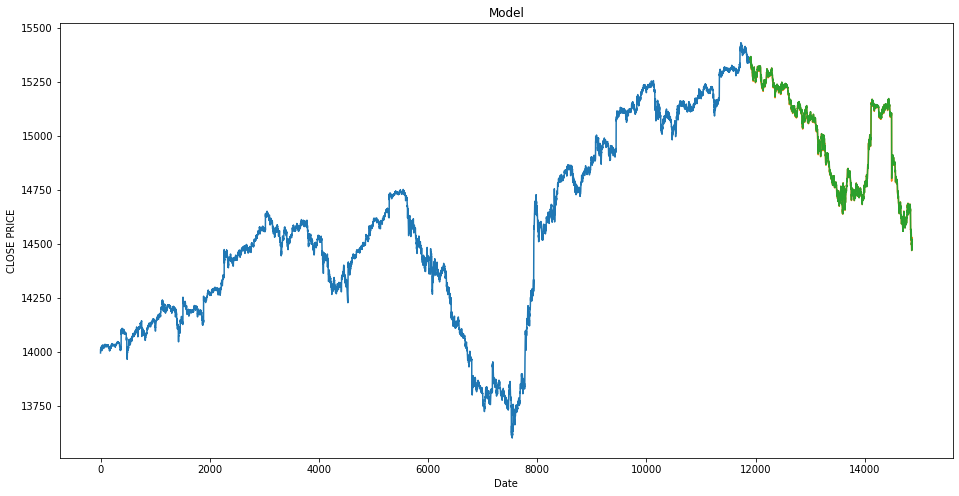

In [ ]:
# Plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
# Visualizing
plt.figure(figsize=(16, 8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("CLOSE PRICE")
plt.plot(train["close"])
plt.plot(valid[['close', 'Predictions']])